#  IN4050 Mandatory Assignment 1: Traveling Salesman Problem


## Rules
Before you begin the exercise, review the rules at this website:
https://www.uio.no/english/studies/examinations/compulsory-activities/mn-ifi-mandatory.html
(This is an individual assignment. You are not allowed to deliver together or copy/share source-code/answers
with others.)

Especially, notice that you are **not allowed to use code or parts of code written by others** in your submission. We do check your code against online repositories, so please be sure to **write all the code yourself**. Any use of **auto-generated code** must be clearly identified, along with the tool or software used to generate it. Read also the "Routines for handling suspicion of cheating and attempted cheating at the University of Oslo": https://www.uio.no/english/studies/examinations/cheating/index.html By submitting this assignment, you confirm that you are familiar with the rules and the consequences of breaking them.

### Delivery

**Deadline**: Tuesday, October 8 2024, 23:59

Your submission should be delivered in Devilry. You may redeliver in Devilry before the deadline, but include all files in the last delivery, as only the last delivery will be read. You are recommended to upload preliminary versions hours (or days) before the final deadline.

## What to deliver?

Deliver one single zipped folder (.zip, .tgz or .tar.gz) which includes:
* PDF report containing:
    * Your name and username (!)
    * Instructions on how to run your program, with example runs.
    * Answers to all questions from assignment.
    * Brief explanation of what you’ve done.
    * *Your PDF may be generated by exporting your Jupyter Notebook to PDF, if you have answered all questions in your notebook*
* Source code
    * Source code may be delivered as jupyter notebooks or python files (.py)
* The european cities file so the program will run right away.
* Any files needed for the group teacher to easily run your program on IFI linux machines.

**Important**: 
* Include example runs of your code by doing the reports described in the tasks. Simply implementing the code, but never running it will not give many points.
* Include the code that was used to make all reports. Do not include reports of performance and time without also including the code that was used to produce it.
* If you weren’t able to finish the assignment, use the PDF report to elaborate on what you’ve tried
and what problems you encountered. Students who have made an effort and attempted all parts of the assignment
will get a sond chance even if they fail initially. This exercise will be graded PASS/FAIL.

## Introduction
In this exercise, you will attempt to solve an instance of the traveling salesman problem (TSP) using different
methods. The goal is to become familiar with evolutionary algorithms and to appreciate their effectiveness on a
difficult search problem. You have to use Python to solve the assignment. You must write
your program from scratch (but you may use non-EA-related libraries).


|  &nbsp;   | Barcelona | Belgrade |  Berlin | Brussels | Bucharest | Budapest |
|:---------:|:---------:|:--------:|:-------:|:--------:|:---------:|:--------:|
| Barcelona |     0     |  1528.13 | 1497.61 |  1062.89 |  1968.42  |  1498.79 |
|  Belgrade |  1528.13  |     0    |  999.25 |  1372.59 |   447.34  |  316.41  |
|   Berlin  |  1497.61  |  999.25  |    0    |  651.62  |  1293.40  |  1293.40 |
|  Brussels |  1062.89  |  1372.59 |  651.62 |     0    |  1769.69  |  1131.52 |
| Bucharest |  1968.42  |  447.34  | 1293.40 |  1769.69 |     0     |  639.77  |
|  Budapest |  1498.79  |  316.41  | 1293.40 |  1131.52 |   639.77  |     0    |


<center>Figure 1: First 6 cities from csv file.</center>


## Problem
The traveling salesman, wishing to disturb the residents of the major cities in some region of the world in
the shortest time possible, is faced with the problem of finding the shortest tour among the cities. A tour
is a path that starts in one city, visits all of the other cities, and then returns to the starting point. The
relevant pieces of information, then, are the cities and the distances between them. In this instance of the
TSP, a number of European cities are to be visited. Their relative distances are given in the data file, *european_cities.csv*, found in the zip file with the mandatory assignment.

(You will use permutations to represent tours in your programs. The **itertools** module in Python provides
a permutations function that returns successive permutations, this is useful for exhaustive search)

## Helper code for visualizing solutions

Here follows some helper code that you can use to visualize the plans you generate. These visualizations can **help you check if you are making sensible tours or not**. The optimization algoritms below should hopefully find relatively nice looking tours, but perhaps with a few visible inefficiencies.

In [120]:
import matplotlib.pyplot as plt
import numpy as np
np.random.seed(57)

#Map of Europe
europe_map = plt.imread('map.png')

#Lists of city coordinates
city_coords = {
    "Barcelona": [2.154007, 41.390205], "Belgrade": [20.46, 44.79], "Berlin": [13.40, 52.52], 
    "Brussels": [4.35, 50.85], "Bucharest": [26.10, 44.44], "Budapest": [19.04, 47.50],
    "Copenhagen": [12.57, 55.68], "Dublin": [-6.27, 53.35], "Hamburg": [9.99, 53.55], 
    "Istanbul": [28.98, 41.02], "Kyiv": [30.52, 50.45], "London": [-0.12, 51.51], 
    "Madrid": [-3.70, 40.42], "Milan": [9.19, 45.46], "Moscow": [37.62, 55.75],
    "Munich": [11.58, 48.14], "Paris": [2.35, 48.86], "Prague": [14.42, 50.07],
    "Rome": [12.50, 41.90], "Saint Petersburg": [30.31, 59.94], "Sofia": [23.32, 42.70],
    "Stockholm": [18.06, 60.33], "Vienna": [16.36, 48.21], "Warsaw": [21.02, 52.24]}


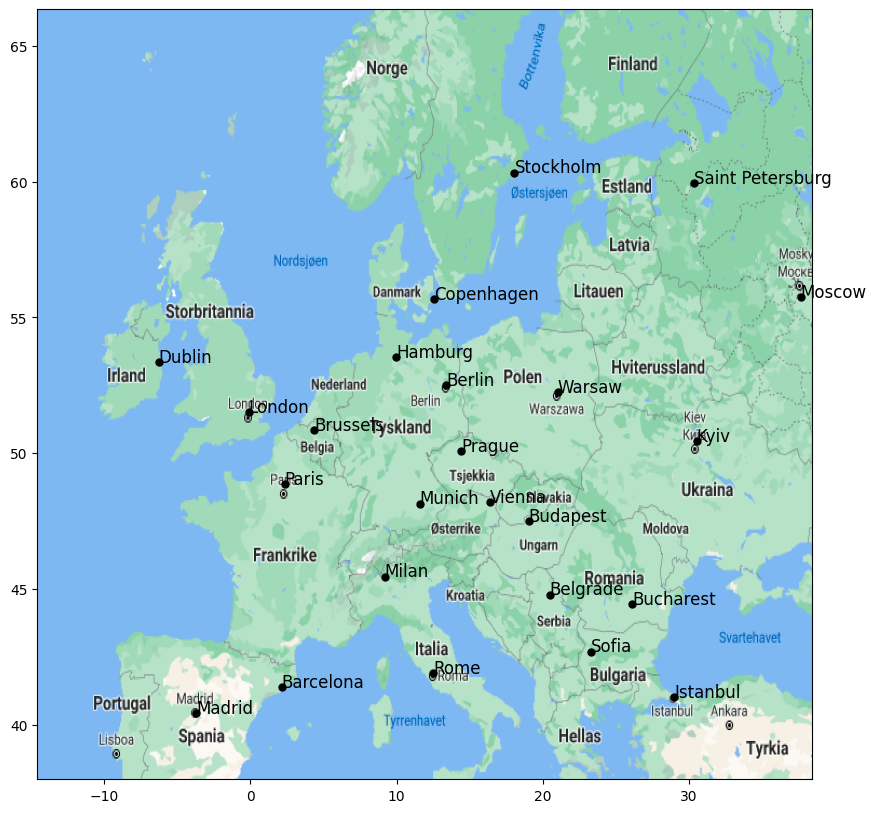

In [121]:
#Helper code for plotting plans
#First, visualizing the cities.
import csv
with open("european_cities.csv", "r") as f:
    data = list(csv.reader(f, delimiter=';'))
    cities = data[0]

fig, ax = plt.subplots(figsize=(10, 10))
ax.imshow(europe_map, extent=[-14.56, 38.43, 37.697 + 0.3, 64.344 + 2.0], aspect="auto")

# Map (long, lat) to (x, y) for plotting
for city, location in city_coords.items():
    x, y = (location[0], location[1])
    plt.plot(x, y, 'ok', markersize=5)
    plt.text(x, y, city, fontsize=12)


In [122]:
#A method you can use to plot your plan on the map.
def plot_plan(city_order):
    fig, ax = plt.subplots(figsize=(10, 10))
    ax.imshow(europe_map, extent=[-14.56, 38.43, 37.697 + 0.3, 64.344 + 2.0], aspect="auto")

    # Map (long, lat) to (x, y) for plotting
    for index in range(len(city_order) - 1):
        current_city_coords = city_coords[city_order[index]]
        next_city_coords = city_coords[city_order[index+1]]
        x, y = current_city_coords[0], current_city_coords[1]
        #Plotting a line to the next city
        next_x, next_y = next_city_coords[0], next_city_coords[1]
        plt.plot([x, next_x], [y, next_y])

        plt.plot(x, y, 'ok', markersize=5)
        plt.text(x, y, index, fontsize=12)
    #Finally, plotting from last to first city
    first_city_coords = city_coords[city_order[0]]
    first_x, first_y = first_city_coords[0], first_city_coords[1]
    plt.plot([next_x, first_x], [next_y, first_y])
    #Plotting a marker and index for the final city
    plt.plot(next_x, next_y, 'ok', markersize=5)
    plt.text(next_x, next_y, index+1, fontsize=12)
    plt.show()


['Barcelona', 'Belgrade', 'Berlin', 'Brussels', 'Bucharest', 'Budapest', 'Copenhagen', 'Dublin', 'Hamburg', 'Istanbul', 'Kyiv', 'London', 'Madrid', 'Milan', 'Moscow', 'Munich', 'Paris', 'Prague', 'Rome', 'Saint Petersburg', 'Sofia', 'Stockholm', 'Vienna', 'Warsaw']


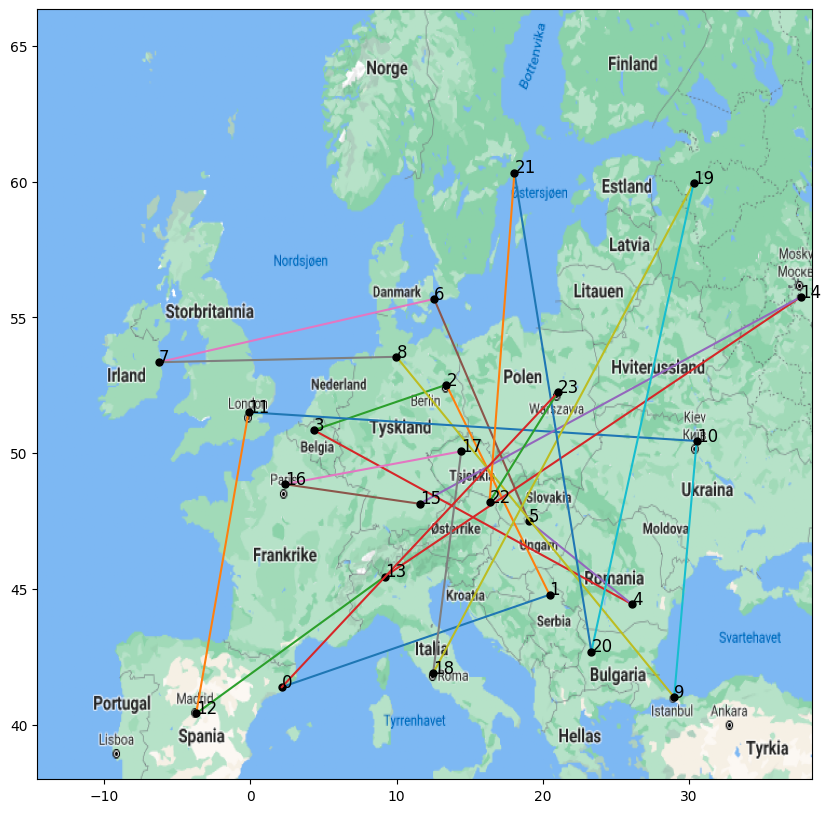

In [123]:
#Example usage of the plotting-method.
plan = list(city_coords.keys()) # Gives us the cities in alphabetic order
print(plan)
plot_plan(plan)

## Exhaustive Search
First, try to solve the problem by inspecting every possible tour. Start by writing a program to find the shortest
tour among a subset of the cities (say, **6** of them). Measure the amount of time your program takes. Incrementally
add more cities and observe how the time increases. Plot the shortest tours you found using the plot_plan method above, for 6 and 10 cities.

**Note:** To get distances between cities, use the dictionary `data` created by reading the file `european_cities.csv`. *Do not* calculate distances based on the coordinates. The actual distances do not only depend on the differences in the coordinates, but also of the curvature of the earth. The distances available in `data` are corrected for this, and contain the actual true distances.

What is the shortest tour (i.e., the actual sequence of cities, and its length) among the first 10 cities (that is,
the cities starting with B,C,D,H and I)? How long did your program take to find it? Calculate an approximation of how long it would take to perform exhaustive search on all 24 cities?

In [124]:
from itertools import permutations

# Helper function to calculate the route given distance 
# Assumes that the first and last city are the same 
def get_route_distance(route):
    distance = 0
    current_city = route[0]
    for city_in_route in route:
        distance += float(data[cities.index(current_city) + 1][cities.index(city_in_route)])
        current_city = city_in_route

    return distance


def exhaustive_search(max_cities=6, verbose=False):
    # Store the best route, and the best distance for the given route
    # Initially no route, and a very high initial distance  
    best_route = []
    best_distance = 100*100

    # Subset of cities. We only take as many cities as given from the max_cities argument 
    subset_city = cities[:max_cities]

    if verbose:
        print("Subset of cites " + str(subset_city))

    # Iterate over each starting city 
    for starting_city in subset_city:
        if verbose:
            print(f'[INFO] {starting_city} as starting city')

        # All possible city that the route can visit.
        # Cannot include the starting city 
        possible_cities = [city for city in subset_city if city != starting_city]

        # Generate all possible permutations, with function from itertools 
        # Link to library: https://docs.python.org/3/library/itertools.html#itertools.permutations
        # Generates all possible permutations, for the list of possible cities
        perm = permutations(possible_cities)

        # Each permutation represents a route in between the starting city
        # We use this to create a full route and calculate its distance 
        for middle_route in perm:
            # A new route 
            route = []

            # Append the starting city, the middle route and the start city again
            route.append(starting_city)
            route.extend(list(middle_route))
            route.append(starting_city)

            # Calculate distance of the route 
            current_distance = get_route_distance(route)
            
            # Check if we found a better route
            if current_distance < best_distance:

                # Set new best route 
                best_distance = current_distance
                best_route = route

    # Returning the best route 
    return best_route, best_distance

In [125]:
# Simple test of a my route implementation, should be equal
sample_route = ['Barcelona', 'Belgrade', 'Berlin', 'Barcelona']
assert(get_route_distance(sample_route)== 4024.99)

### 6 Cities Exhaustive search (with timer)

In [126]:
# Importing libraries for keeping track of time spent 
from timeit import default_timer as timer
from datetime import timedelta

# Start timer 
start = timer()

# Using exhaustive search 
six_city_route, six_city_distance = exhaustive_search(max_cities=6, verbose=True)

end = timer()
print("Result:")
print(f'    Best Route: {six_city_route}')
print(f'    Distance: {six_city_distance}')
print(f'    Time Elapsed: {timedelta(seconds=end-start)}')

Subset of cites ['Barcelona', 'Belgrade', 'Berlin', 'Brussels', 'Bucharest', 'Budapest']
[INFO] Barcelona as starting city
[INFO] Belgrade as starting city
[INFO] Berlin as starting city
[INFO] Brussels as starting city
[INFO] Bucharest as starting city
[INFO] Budapest as starting city
Result:
    Best Route: ['Barcelona', 'Belgrade', 'Bucharest', 'Budapest', 'Berlin', 'Brussels', 'Barcelona']
    Distance: 5018.8099999999995
    Time Elapsed: 0:00:00.004288


Plotting the route on the map

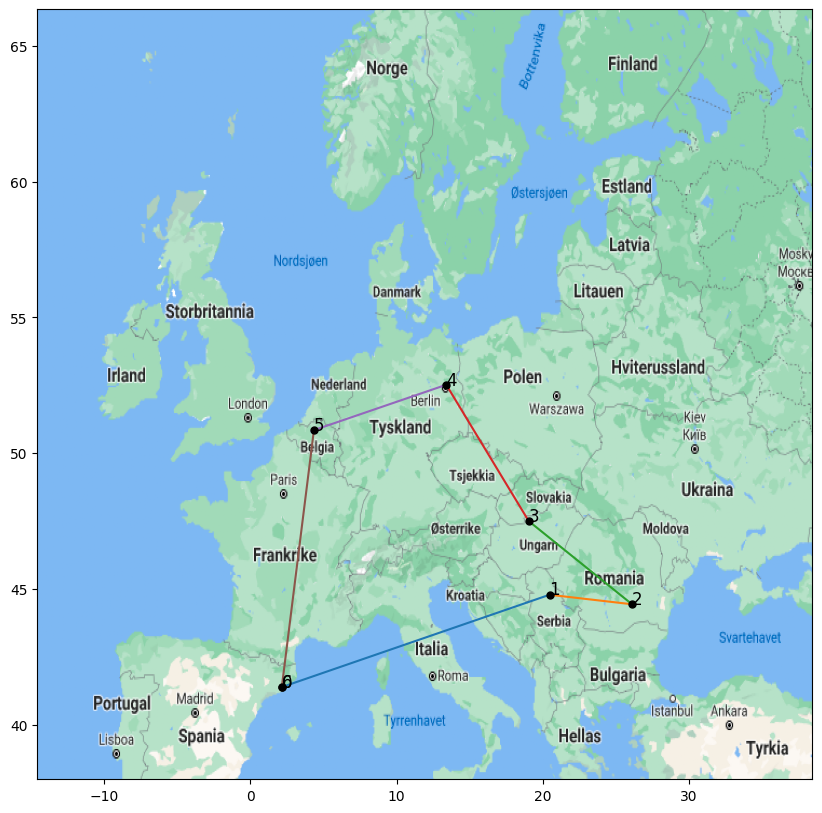

In [127]:
plot_plan(six_city_route)

### 10 Cities Exhaustive search (with timer)

In [128]:
# Start timer 
start = timer()

# Using exhaustive search 
ten_city_route, ten_city_distance = exhaustive_search(max_cities=10, verbose=True)

end = timer()
print("Result:")
print(f'    Best Route: {ten_city_route}')
print(f'    Distance: {ten_city_distance}')
print(f'    Time Elapsed: {timedelta(seconds=end-start)}')

Subset of cites ['Barcelona', 'Belgrade', 'Berlin', 'Brussels', 'Bucharest', 'Budapest', 'Copenhagen', 'Dublin', 'Hamburg', 'Istanbul']
[INFO] Barcelona as starting city
[INFO] Belgrade as starting city
[INFO] Berlin as starting city
[INFO] Brussels as starting city
[INFO] Bucharest as starting city
[INFO] Budapest as starting city
[INFO] Copenhagen as starting city
[INFO] Dublin as starting city
[INFO] Hamburg as starting city
[INFO] Istanbul as starting city
Result:
    Best Route: ['Copenhagen', 'Hamburg', 'Brussels', 'Dublin', 'Barcelona', 'Belgrade', 'Istanbul', 'Bucharest', 'Budapest', 'Berlin', 'Copenhagen']
    Distance: 7486.309999999999
    Time Elapsed: 0:00:12.002722


Plotting the route for the 10 cities 

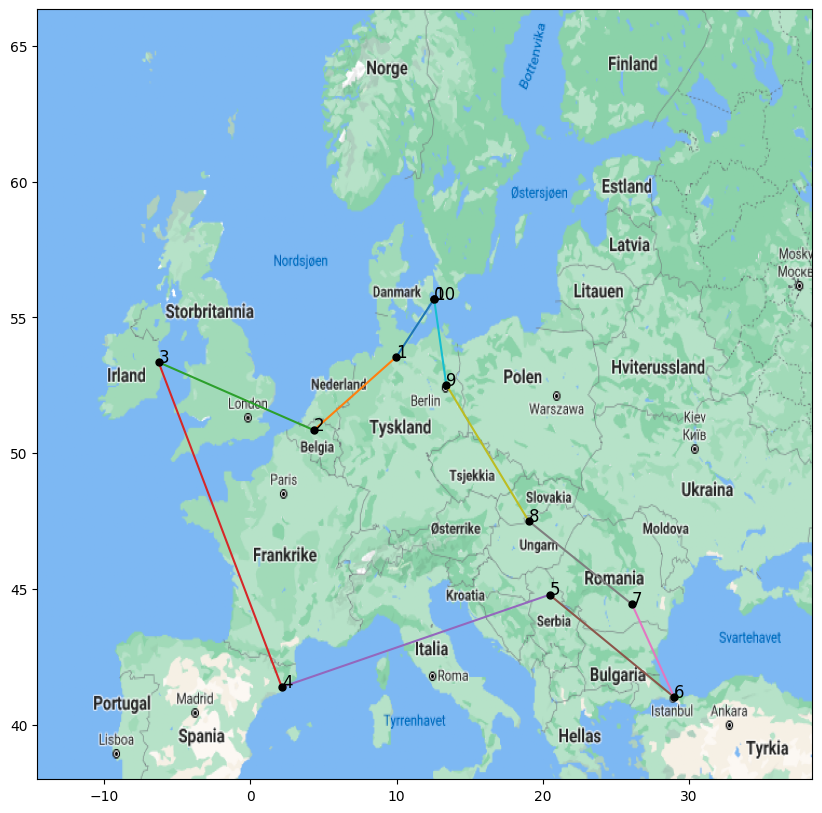

In [129]:
plot_plan(ten_city_route)

### How long would it take for 24 cities?

In the report added in the assignment, I show how I approximated the total amount of seconds it would have taken for 24 cities. The result of my approximation was a total of $1.570354905 \times 10^{18} \text{ seconds}$  

To make it more readable, I used the following library. 
It has way to make seconds in a more readable format. Link to docs: 
https://humanfriendly.readthedocs.io/en/latest/api.html#humanfriendly.format_timespan

Running the codeblock below, shows how long time 24 cities with exhaustive search would have taken:

In [130]:
from humanfriendly import format_timespan

# Using the total time in seconds as argument 
print(format_timespan(1.73217e18))

55077648046 years, 20 weeks and 4 days


## Hill Climbing
Then, write a simple hill climber to solve the TSP. How well does the hill climber perform, compared to the result from the exhaustive search for the first **10 cities**? Since you are dealing with a stochastic algorithm, you
should run the algorithm several times to measure its performance. Report the length of the tour of the best,
worst and mean of 20 runs (with random starting tours), as well as the standard deviation of the runs, both with the **10 first cities**, and with all **24 cities**. Plot one of the the plans from the 20 runs for both 10 cities and 24 cities (you can use plot_plan). 

In [131]:
import random
import statistics

# Create random route. 
def create_random_route(start_city, subset_city):
    # Create a new route with a starting city
    random_route = [start_city]
    
    # Shuffle the all other cities except the starting city and add it to the route
    # Then add the starting city again to complete the route
    middle_route = [given_city for given_city in subset_city if given_city != start_city]
    random.shuffle(middle_route)
    random_route.extend(middle_route)
    random_route.append(start_city)

    # Return the new random route
    return random_route


def print_hill_climb_performances(routes_tested: list):
    # Variables to keep track of best, and worst distances
    best_route = []
    best_route_distance = 1000*1000

    worst_route = []
    worst_route_distance = -100*100

    distance_sum = 0
    distances = []

    # Iterate over the list and find the best and worst route
    for route in routes_tested:
        current_route = route
        current_distance = get_route_distance(current_route)

        # Check if it is the best so far
        if current_distance < best_route_distance:
            best_route = current_route
            best_route_distance = current_distance
        
        # Check if worse route 
        if current_distance > worst_route_distance:
            worst_route = current_route
            worst_route_distance = current_distance

        distance_sum += current_distance
        distances.append(current_distance)

    # Best solution 
    print(f"____________Best Solution____________")
    print(f"    Route: {best_route}")
    print(f"    Distance: {best_route_distance}")

    # Worst solution 
    print(f"\n____________Worst Solution____________")
    print(f"    Route: {worst_route}")
    print(f"    Distance: {worst_route_distance}")

    # Printing the average and standard deviation 
    # Round both to the closest two decimals 
    print(f"\n____________Other Information____________")
    print(f"    Average distance: {round(distance_sum/len(routes_tested), 2)}")

    # Using the statistics module for calculating the standard deviation of all the distances
    # See docs here: https://docs.python.org/3/library/statistics.html#statistics.stdev
    print(f"    Standard deviation: {round(statistics.stdev(distances), 2)}")


# Implement the algorithm here
def hill_climbing(max_cities=10, max_iterations=10000, verbose=False):
    # Subset of cities. We only take as many cities as given from the max_cities argument 
    subset_city = cities[:max_cities]

    # Pick a random city to start at  
    start_city = random.choice(subset_city)
    if verbose:
        print(f"[INFO] {start_city} as starting city ")


    # Create a random new best route and calculate its distance
    best_route = create_random_route(start_city=start_city, subset_city=subset_city)
    best_distance = get_route_distance(best_route)
    
    # Run and try new neighboring solution 
    for _ in range(max_iterations):
        # Create a new route 
        new_route = list(best_route)

        # Swap to cities at random to make a new neighbor solution 
        # First we get two indexes of cities to swap the cities in the route 
        # Note that we only can pick the cities in the the middle of the route and never the starting city
        i, j = random.sample(range(1, len(new_route) - 1), 2)
        new_route[i], new_route[j] = new_route[j], new_route[i]
        new_route_distance = get_route_distance(new_route)

        # Test if this is a better route 
        if new_route_distance < best_distance:
            # Set the route to the best route
            best_route = new_route
            best_distance = new_route_distance

    # Return route and the route given distance
    return best_route

Helper function for testing with `n` runs:

In [132]:
# Method to run the hill climbing and collect all the best runs in a list of routes
def run_hill_climbing(cities=10, runs=20):
    routes = []
    for _ in range(runs):
        current_best_route = hill_climbing(max_cities=cities)
        routes.append(current_best_route)
    return routes

### 10 Cities test with random starting route and 20 runs: 

In [133]:
# Run 20 times for 10 cities
ten_cities_routes = run_hill_climbing(cities=10, runs=20)

# Print performance
print_hill_climb_performances(routes_tested=ten_cities_routes)

____________Best Solution____________
    Route: ['Hamburg', 'Copenhagen', 'Berlin', 'Budapest', 'Bucharest', 'Istanbul', 'Belgrade', 'Barcelona', 'Dublin', 'Brussels', 'Hamburg']
    Distance: 7486.3099999999995

____________Worst Solution____________
    Route: ['Hamburg', 'Copenhagen', 'Berlin', 'Budapest', 'Belgrade', 'Brussels', 'Dublin', 'Barcelona', 'Istanbul', 'Bucharest', 'Hamburg']
    Distance: 9482.76

____________Other Information____________
    Average distance: 7980.09
    Standard deviation: 562.05


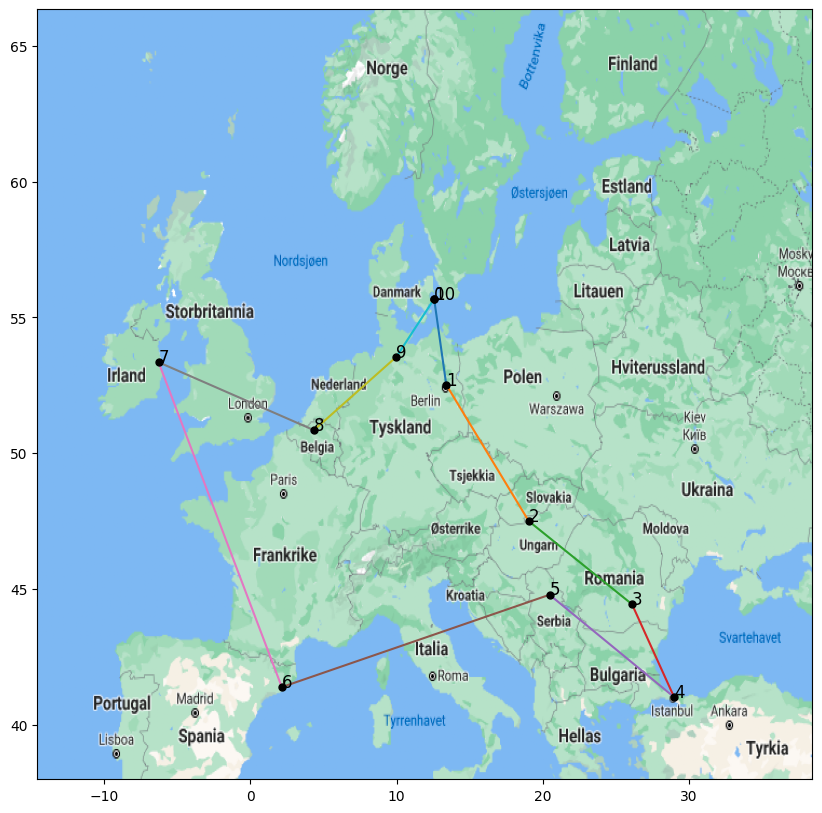

In [134]:
# Plot a random route from all the route tested
plot_plan(random.choice(ten_cities_routes))

### 20 Cities test with random starting route and 20 runs: 

In [135]:
# Run 20 times for 20 cities
twenty_cities_routes = run_hill_climbing(cities=20, runs=20)

# Print performance
print_hill_climb_performances(routes_tested=twenty_cities_routes)

____________Best Solution____________
    Route: ['Moscow', 'Kyiv', 'Istanbul', 'Bucharest', 'Belgrade', 'Budapest', 'Rome', 'Milan', 'Barcelona', 'Madrid', 'Paris', 'Munich', 'Prague', 'Berlin', 'Brussels', 'London', 'Dublin', 'Hamburg', 'Copenhagen', 'Saint Petersburg', 'Moscow']
    Distance: 12425.1

____________Worst Solution____________
    Route: ['Saint Petersburg', 'Copenhagen', 'Moscow', 'Kyiv', 'Bucharest', 'Istanbul', 'Rome', 'Barcelona', 'Madrid', 'Milan', 'Belgrade', 'Budapest', 'Berlin', 'Hamburg', 'Brussels', 'London', 'Dublin', 'Paris', 'Munich', 'Prague', 'Saint Petersburg']
    Distance: 15226.699999999999

____________Other Information____________
    Average distance: 13792.95
    Standard deviation: 913.91


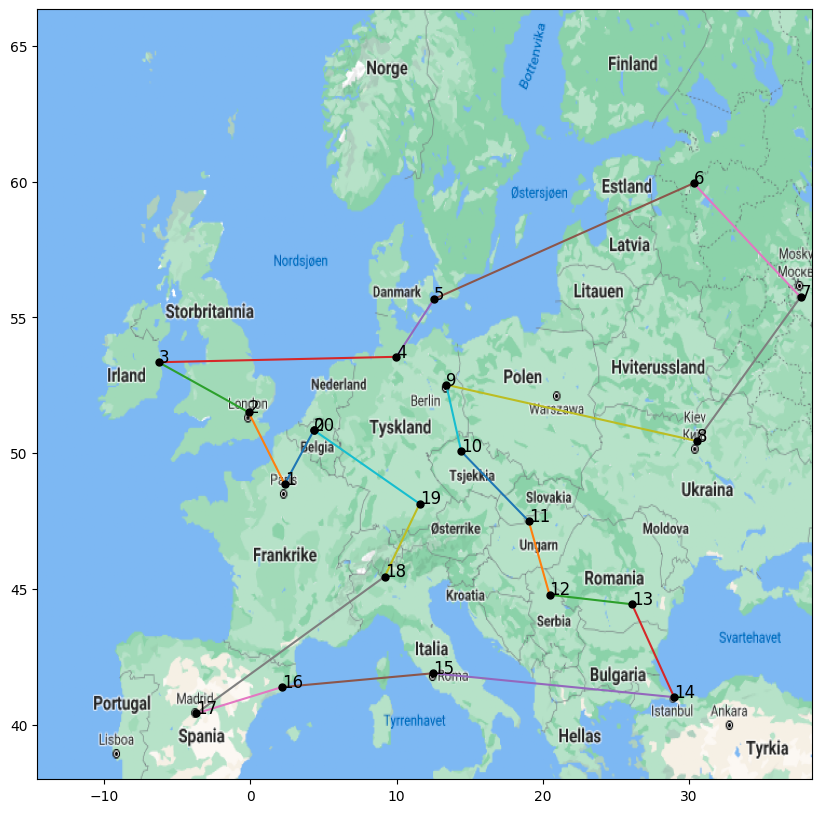

In [136]:
# Plot a random route from all the route tested
plot_plan(random.choice(twenty_cities_routes))

## Genetic Algorithm
Next, write a genetic algorithm (GA) to solve the problem. Choose mutation and crossover operators that are appropriate for the problem (see chapter 4.5 of the Eiben and Smith textbook). Choose three different values for the population size. Define and tune other parameters yourself and make assumptions as necessary (and report them, of course).

For all three variants: As with the hill climber, report best, worst, mean and standard deviation of tour length out of 20 runs of the algorithm (of the best individual of last generation). Also, find and plot the average fitness of the best fit individual in each generation (average across runs), and include a figure with all three curves in the same plot in the report. This means that the x-axis should be the generations over time and the y-axis should be the average (over the 20-runs) fitness of the best gene in that generation. Conclude which is best in terms of tour length and number of generations of evolution time.

Finally, plot an example optimized tour (the best of the final generation) for the three different population sizes, using the plot_plan method.

In [137]:
# Implement the algorithm here

# The following methods in the GA scheme 
# - Population initialization - create a initial set of solutions 
# - Parent selection method - some way to select parents to create offspring
# - Offspring creation - creating new solutions that are both use exploring and exploitation 
# - Survivor selection - we need a way to keep both exploring and exploitation solutions 


def generate_random_route(cities:list):
    # Randomly shuffle the list and pick a random route 
    route = cities
    random.shuffle(route)
    
    # Add the start city to the route
    route.append(route[0])

    return route 

def create_population(cities: list, population_size: int):
    # Create a random route for each 
    return [generate_random_route(cities) for _ in range(population_size)]


def fitness(route:list):
    return 1 / (get_route_distance(route) + 1e-6)


def parent_select(current_population: list[list], parents_needed: int):
    # Roulette implementation. 
    # First calculate the total sum of all fitness scores
    fitness_sum = 0
    for route in current_population:
        fitness_sum += fitness(route)
    
    # Creating a list of probabilities for each route
    prob = [fitness(route) / fitness_sum for route in current_population]


    # Iterate until the list of parents are filled
    parents = []
    while(len(parents) < parents_needed):
        # Use the numpy choice to select a random parent that has the given probability 
        # Documentation: https://numpy.org/doc/stable/reference/random/generated/numpy.random.choice.html
        # - a: the array of elements to pick from
        # - p: probability of each element in the array
        # - replace: set to false to not allow duplicates
        parents_indexes = np.random.choice(a=len(current_population), p=prob, replace=False)
        
        # Add the parent 
        parents.append(current_population[parents_indexes])

    # Return the parents 
    return parents


def mutate(offspring: list):
    # Select two random indexes to swap
    # Make sure not to swap an edge value
    i, j = random.sample(range(1, len(offspring) - 1), 2)
    offspring[i], offspring[j] = offspring[j], offspring[i]
    return offspring


def get_adjacency_matrix(parent:list):
    matrix = {}
    for index, city in enumerate(parent):
        if city not in matrix:
            adjacent_cities = []

            # Check if we can add city to left
            if index > 0:
                adjacent_cities.append(parent[index - 1])
            
            # Check if we can add the city to the right 
            if index < len(parent): 
                adjacent_cities.append(parent[index + 1])


            matrix[city] = adjacent_cities

    return matrix

def union_adjacency_matrixes(matrix1:dict, matrix2:dict):
    union_matrix = {}

    for city in matrix1:
        # Combine lists from both matrices, removing duplicates
        union_matrix[city] = list(set(matrix1[city] + matrix2[city]))

    return union_matrix
    

def edge_recombination_operator(parent1:list, parent2:list):
    # Docs: https://en.wikipedia.org/wiki/Edge_recombination_operator
    # Create adjacency matrix for both parents
    parent1_matrix = get_adjacency_matrix(parent1)
    parent2_matrix = get_adjacency_matrix(parent2)

    # Create the union matrix by both 
    union_matrix = union_adjacency_matrixes(parent1_matrix, parent2_matrix)

    # Select a parent, and use that parent as the start city  
    start_city = parent1[0] if random.random() > 0.5 else parent2[0]

    # Create a new offspring
    offspring = [start_city]

    # Iterate until the route has been completed
    # - Keep track of all visited cities 
    # - Also keep track of the current city we need to find a neighbor for.
    visited_cities = set(offspring)
    current_city = start_city
    while len(offspring) <= len(parent1) - 1:
        # Get the edges that we are can pick from
        # Has to be a city that is a neighbor and not visited
        neighbors =  [city for city in union_matrix[current_city] if city not in visited_cities]

        # Check that there is a valid neighbor
        if len(neighbors) > 0:
            # Then we choose the city with the least edges 
            next_city = min(neighbors, key=lambda city: len(union_matrix[city])) 
        else:
            # Base case when there is no adjacent city 
            # If we have visited all cites, then we break out of the while loop
            next_cities = [city for city in parent1 if city not in visited_cities]

            # Case: when we have already made the full list of cities
            if len(next_cities) == 0:
                break
            
            # If not we choose a random city
            next_city = next_cities[0]

        
        # Add the city to the route, and set it to visited
        offspring.append(next_city)
        visited_cities.add(next_city)

        # Set it to the next city to visit
        current_city = next_city

    # Return the offspring
    # It should be the same length as a parent and have the same start and end city 
    offspring.append(start_city)

    # We must validate the offspring.
    # It should generate a correct offspring 
    assert(len(offspring) == len(parent1), f"Offspring length: {len(offspring)}, Parent length: {len(parent1)}")
    assert(offspring[0] == offspring[-1], f"First city: {offspring[0]}, last city: {offspring[-1]}")
    
    # Return the valid offspring 
    return offspring


def create_offspring(parents: list[list], offspring_to_be_created):
    offspring = []
    while(len(offspring) < offspring_to_be_created):
        # Take two random parents 
        parent1 = parents[np.random.choice(len(parents))]
        parent2 = parents[np.random.choice(len(parents))]

        # Use the two parents to create a offspring 
        child = edge_recombination_operator(parent1, parent2)
        
        # Append it to the list
        offspring.append(child)

    # Return the list of offspring created 
    return offspring


def select_survivors(current_population: list[list], population_size: int):
    print(f"Population size before reduction: {len(current_population)}")
    
    # Sort based on fitness
    current_population.sort(key=fitness)

    # Take the best fitted survivors 
    return current_population[:population_size]



def get_best_and_avg_distances(routes:list[list]):
    best_distance = 0
    best_route = []
    distance_sum = 0
    for route in routes: 
        # Get the distance for the route
        current_distance = get_route_distance(route)
        distance_sum += current_distance

        # Check if we found a better distance 
        if current_distance < best_distance:
            best_distance = current_distance
            best_route = route
    
    # Return the best and average distance for the given set of routes
    return best_route, best_distance, distance_sum / len(routes)

<>:149: SyntaxWarning: assertion is always true, perhaps remove parentheses?
<>:150: SyntaxWarning: assertion is always true, perhaps remove parentheses?
<>:149: SyntaxWarning: assertion is always true, perhaps remove parentheses?
<>:150: SyntaxWarning: assertion is always true, perhaps remove parentheses?
/tmp/ipykernel_2636287/2454790682.py:149: SyntaxWarning: assertion is always true, perhaps remove parentheses?
  assert(len(offspring) == len(parent1), f"Offspring length: {len(offspring)}, Parent length: {len(parent1)}")
/tmp/ipykernel_2636287/2454790682.py:150: SyntaxWarning: assertion is always true, perhaps remove parentheses?
  assert(offspring[0] == offspring[-1], f"First city: {offspring[0]}, last city: {offspring[-1]}")


The methods are all used in this single method for running GA on the problem:

In [140]:
def genetic_algorithm(max_cities: int, population_size: int, max_generations:int, best_max:int = 10):
    # Keep track of populations 
    current_generations = 0

    # Possible cities that we can take from to generate solutions 
    possible_cities = cities[:max_cities]

    # Initialize a population 
    population = create_population(cities=possible_cities, population_size=population_size)
    print(f"Initial population size: {len(population)}")

    # Keep track of how many generations in a row we hit the same best solution
    best_in_a_row = 0
    best_of_all_gens = 100*100
    best_route = []

    # Children generated each time, set to 40% of the population 
    offspring_generated_each_gen = population_size * 0.4 
    print(f"Offspring created each generation: {offspring_generated_each_gen}")

    # Run GA loop
    # Terminate either if:
    # - we hit maximum given 
    while(current_generations < max_generations or best_in_a_row > best_max):
        # Select parents for mutation 
        # We need twice as many parents as we need to generate offspring 
        parents_for_offspring = parent_select(current_population=population, parents_needed=offspring_generated_each_gen*2)

        # Create offspring with parents 
        offspring = create_offspring(parents=parents_for_offspring, offspring_to_be_created=offspring_generated_each_gen) 

        # Total population with both the original population and the offspring 
        total_population = [population + offspring]

        print(f"Population size: {total_population}")

        # Select the survivors of the total population, and set it to be the new population
        population = select_survivors(current_population=total_population, population_size=population_size)

        # Done with a generation 
        current_generations += 1

        # Get the best and average for the population
        current_best_route, best, avr = get_best_and_avg_distances(population)

        # Log information about the generation
        print(f"GEN {current_generations}:      best was {best}, average was {avr}")


        # Check if we hit the same best solution in a row
        if best == best_of_all_gens:
            best_in_a_row += 1
        else:
            best_in_a_row = 0

            # Set it to the best route of the generation if the distance was lowest 
            if best < best_of_all_gens:
                best_of_all_gens = best
                best_route = current_best_route
                


    return best_route

Among the first 10 cities, did your GA find the shortest tour (as found by the exhaustive search)? Did it come close? 

For both 10 and 24 cities: How did the running time of your GA compare to that of the exhaustive search? 

How many tours were inspected by your GA as compared to by the exhaustive search?

## 10 cities

In [141]:
# Do the genetic algorithm 
ten_city_route_best_ga = genetic_algorithm(max_cities=10, population_size=200, max_generations=100, best_max=20)

Initial population size: 200
Offspring created each generation: 80.0
Population size: [[['Barcelona', 'Istanbul', 'Budapest', 'Hamburg', 'Istanbul', 'Hamburg', 'Barcelona', 'Barcelona', 'Dublin', 'Barcelona', 'Barcelona', 'Bucharest', 'Barcelona', 'Barcelona', 'Barcelona', 'Istanbul', 'Bucharest', 'Istanbul', 'Belgrade', 'Barcelona', 'Belgrade', 'Belgrade', 'Hamburg', 'Istanbul', 'Barcelona', 'Copenhagen', 'Berlin', 'Hamburg', 'Copenhagen', 'Hamburg', 'Budapest', 'Brussels', 'Berlin', 'Barcelona', 'Istanbul', 'Dublin', 'Istanbul', 'Belgrade', 'Istanbul', 'Dublin', 'Brussels', 'Barcelona', 'Budapest', 'Budapest', 'Istanbul', 'Istanbul', 'Barcelona', 'Brussels', 'Dublin', 'Brussels', 'Berlin', 'Istanbul', 'Bucharest', 'Istanbul', 'Brussels', 'Bucharest', 'Bucharest', 'Hamburg', 'Belgrade', 'Belgrade', 'Dublin', 'Istanbul', 'Istanbul', 'Istanbul', 'Barcelona', 'Belgrade', 'Budapest', 'Istanbul', 'Istanbul', 'Bucharest', 'Belgrade', 'Hamburg', 'Dublin', 'Barcelona', 'Dublin', 'Istanbul', '

ValueError: ['Barcelona', 'Istanbul', 'Budapest', 'Hamburg', 'Istanbul', 'Hamburg', 'Barcelona', 'Barcelona', 'Dublin', 'Barcelona', 'Barcelona', 'Bucharest', 'Barcelona', 'Barcelona', 'Barcelona', 'Istanbul', 'Bucharest', 'Istanbul', 'Belgrade', 'Barcelona', 'Belgrade', 'Belgrade', 'Hamburg', 'Istanbul', 'Barcelona', 'Copenhagen', 'Berlin', 'Hamburg', 'Copenhagen', 'Hamburg', 'Budapest', 'Brussels', 'Berlin', 'Barcelona', 'Istanbul', 'Dublin', 'Istanbul', 'Belgrade', 'Istanbul', 'Dublin', 'Brussels', 'Barcelona', 'Budapest', 'Budapest', 'Istanbul', 'Istanbul', 'Barcelona', 'Brussels', 'Dublin', 'Brussels', 'Berlin', 'Istanbul', 'Bucharest', 'Istanbul', 'Brussels', 'Bucharest', 'Bucharest', 'Hamburg', 'Belgrade', 'Belgrade', 'Dublin', 'Istanbul', 'Istanbul', 'Istanbul', 'Barcelona', 'Belgrade', 'Budapest', 'Istanbul', 'Istanbul', 'Bucharest', 'Belgrade', 'Hamburg', 'Dublin', 'Barcelona', 'Dublin', 'Istanbul', 'Istanbul', 'Barcelona', 'Hamburg', 'Barcelona', 'Hamburg', 'Barcelona', 'Dublin', 'Belgrade', 'Hamburg', 'Copenhagen', 'Belgrade', 'Dublin', 'Barcelona', 'Barcelona', 'Copenhagen', 'Dublin', 'Barcelona', 'Barcelona', 'Dublin', 'Barcelona', 'Bucharest', 'Barcelona', 'Barcelona', 'Barcelona', 'Hamburg', 'Brussels', 'Bucharest', 'Bucharest', 'Bucharest', 'Istanbul', 'Istanbul', 'Barcelona', 'Istanbul', 'Barcelona', 'Barcelona', 'Hamburg', 'Belgrade', 'Barcelona', 'Barcelona', 'Barcelona', 'Barcelona', 'Hamburg', 'Istanbul', 'Bucharest', 'Istanbul', 'Dublin', 'Brussels', 'Berlin', 'Hamburg', 'Bucharest', 'Hamburg', 'Istanbul', 'Hamburg', 'Belgrade', 'Belgrade', 'Brussels', 'Barcelona', 'Dublin', 'Bucharest', 'Barcelona', 'Istanbul', 'Brussels', 'Barcelona', 'Brussels', 'Budapest', 'Barcelona', 'Budapest', 'Barcelona', 'Barcelona', 'Budapest', 'Bucharest', 'Budapest', 'Bucharest', 'Hamburg', 'Dublin', 'Istanbul', 'Istanbul', 'Dublin', 'Budapest', 'Belgrade', 'Budapest', 'Istanbul', 'Barcelona', 'Istanbul', 'Dublin', 'Dublin', 'Barcelona', 'Hamburg', 'Dublin', 'Belgrade', 'Bucharest', 'Istanbul', 'Barcelona', 'Bucharest', 'Belgrade', 'Dublin', 'Budapest', 'Brussels', 'Istanbul', 'Barcelona', 'Brussels', 'Barcelona', 'Dublin', 'Dublin', 'Barcelona', 'Hamburg', 'Dublin', 'Bucharest', 'Istanbul', 'Barcelona', 'Barcelona', 'Istanbul', 'Istanbul', 'Bucharest', 'Belgrade', 'Hamburg', 'Belgrade', 'Bucharest', 'Berlin', 'Barcelona', 'Istanbul', 'Belgrade', 'Barcelona', 'Barcelona', 'Barcelona', 'Dublin', 'Budapest', 'Hamburg', 'Dublin', 'Bucharest', 'Hamburg', 'Barcelona', 'Belgrade', 'Barcelona'] is not in list

In [ ]:
# Plot the 10 best city route
plot_plan(ten_city_route_best_ga)